[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [5]:
df=pd.read_csv("athlete_events.csv")

### Don't forget to drop duplicates first

In [ ]:
df=df.drop_duplicates()

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### plot the Number of males and females

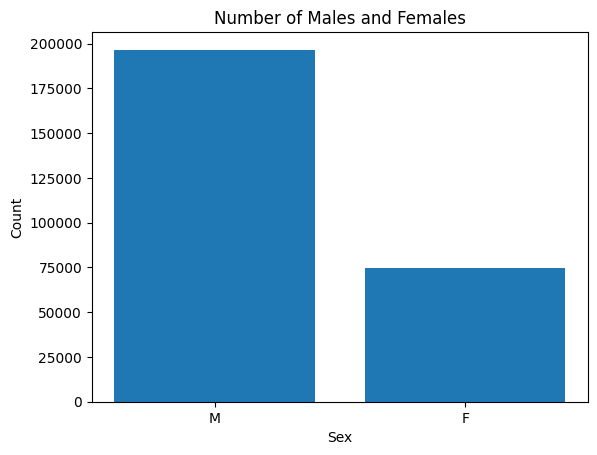

In [ ]:
x=df['Sex'].value_counts()
y=x.values
plt.bar(x.index,y)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Males and Females')
plt.show()

### How many cities do we have and what are they ?

In [ ]:
cities=df['City'].unique()
number_of_cities=df['City'].nunique()
print(f'we have {number_of_cities} cities',)
print("Ther are ", cities)

we have 42 cities
Ther are  ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year and plot them

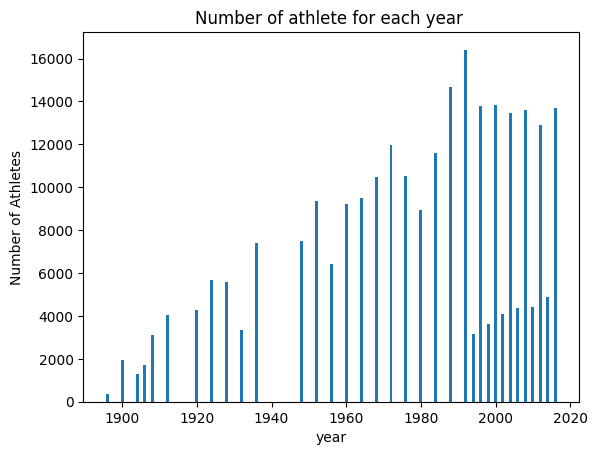

In [ ]:
athlete_counts=df['Year'].value_counts().sort_index()
x=athlete_counts.index
y=athlete_counts.values
plt.bar(x,y)
plt.xlabel('year')
plt.ylabel('Number of Athletes')
plt.title('Number of athlete for each year ')
plt.show()

### Which athlete participated the most? (his/her name and ID)

In [ ]:
athlete_counts=df['Name'].value_counts()
most_participated_athlete=athlete_counts.idxmax()
athlete_id=df[df['Name']==most_participated_athlete]['ID'].values[0]
print(f'The athlete who participated the most is {most_participated_athlete},with ID {athlete_id}')

The athlete who participated the most is Robert Tait McKenzie,with ID 77710


# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this
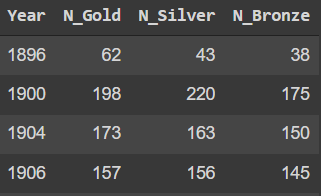

In [77]:
medal_counts =df.groupby(['Year','Medal']).size().unstack(fill_value= 0)
medal_schedule=medal_counts.reset_index().rename_axis(None,axis=1)
medal_schedule

,Year,Bronze,Gold,Silver
0,1896,38,62,43
1,1900,175,201,228
2,1904,150,173,163
3,1906,145,157,156
4,1908,256,294,281
5,1912,300,326,315
6,1920,367,493,448
7,1924,311,332,319
8,1928,281,275,267
9,1932,232,261,246


# plot the previous table

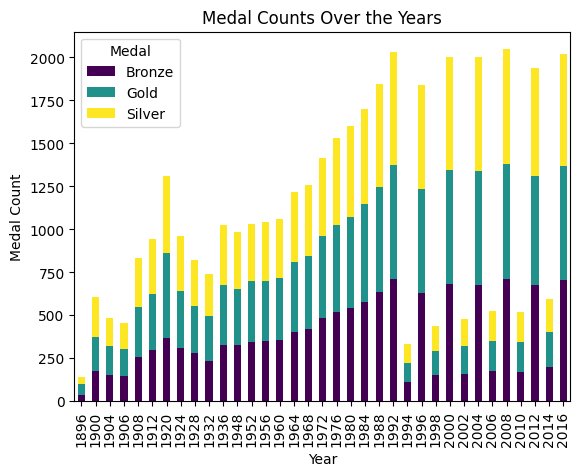

In [78]:
medal_schedule.set_index('Year').plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.title("Medal Counts Over the Years")
plt.legend(title="Medal")
plt.show()

# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [18]:
gold_winners=df[df['Medal']=='Gold']
gold_winners_per_city=gold_winners['City'].value_counts()
gold_winners_per_city

London                    1215
Athina                     883
Los Angeles                726
Beijing                    671
Rio de Janeiro             665
Sydney                     663
Atlanta                    608
Barcelona                  559
Seoul                      520
Antwerpen                  493
Paris                      478
Moskva                     457
Montreal                   438
Munich                     404
Mexico City                359
Tokyo                      347
Stockholm                  338
Berlin                     312
Roma                       309
Helsinki                   306
Melbourne                  290
Amsterdam                  245
Sochi                      202
Torino                     176
Vancouver                  174
St. Louis                  173
Salt Lake City             162
Nagano                     145
Innsbruck                  131
Lillehammer                110
Albertville                104
Lake Placid                104
Calgary 

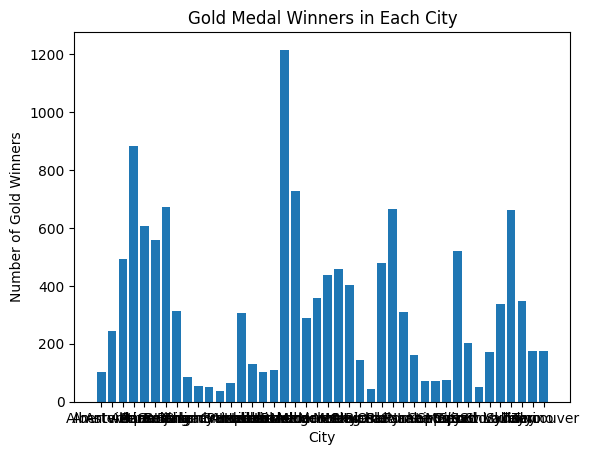

In [51]:
plt.bar(gold_winners_by_city['City'], gold_winners_by_city['Gold Winners'])
plt.xlabel('City')
plt.ylabel('Number of Gold Winners')
plt.title('Gold Medal Winners in Each City')
plt.show()

### Find the total missing data for each year?

In [79]:
missing_data_by_year = df.groupby('Year')['Year'].apply(lambda x: x.isnull().sum()).reset_index(name='Missing Data')

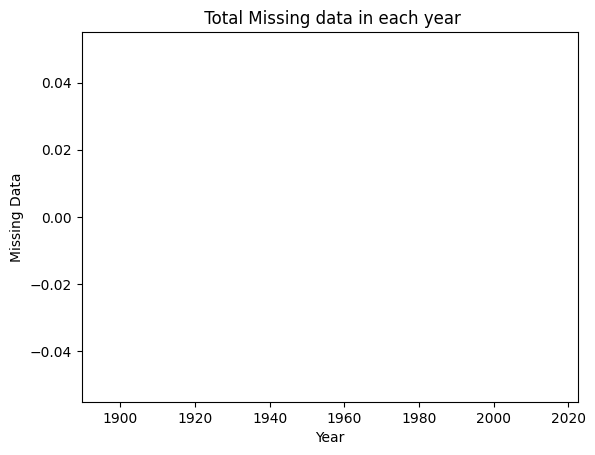

In [80]:
plt.bar(missing_data_by_year['Year'],missing_data_by_year['Missing Data'])
plt.xlabel('Year')
plt.ylabel('Missing Data')
plt.title(' Total Missing data in each year')
plt.show()

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [60]:
athlete_counts = df.groupby(['Season', 'Year'])['Name'].nunique()

summer_counts = athlete_counts['Summer']
winter_counts = athlete_counts['Winter']

has_changed = not summer_counts.equals(winter_counts)
print("Number of athletes has changed:", has_changed)

Number of athletes has changed: True


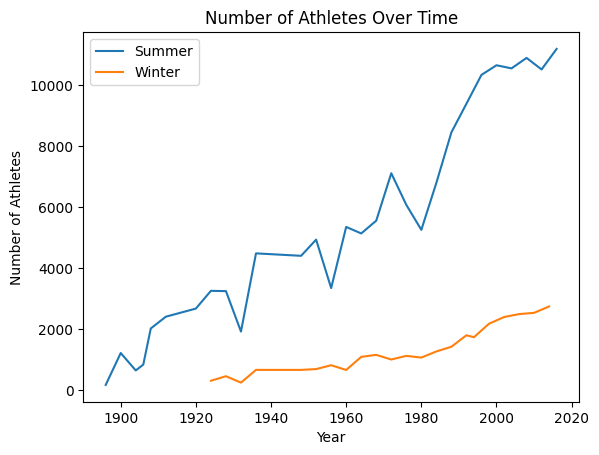

In [61]:
athlete_counts = athlete_counts.reset_index()

summer_data = athlete_counts[athlete_counts['Season'] == 'Summer']
winter_data = athlete_counts[athlete_counts['Season'] == 'Winter']

plt.plot(summer_data['Year'], summer_data['Name'], label='Summer')
plt.plot(winter_data['Year'], winter_data['Name'], label='Winter')

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes Over Time')
plt.legend()

plt.show()

#<font color='red'> **Bouns Questions</fond>**

### How has the participation of male vs. female athletes changed over the years? (You can use a line plot)

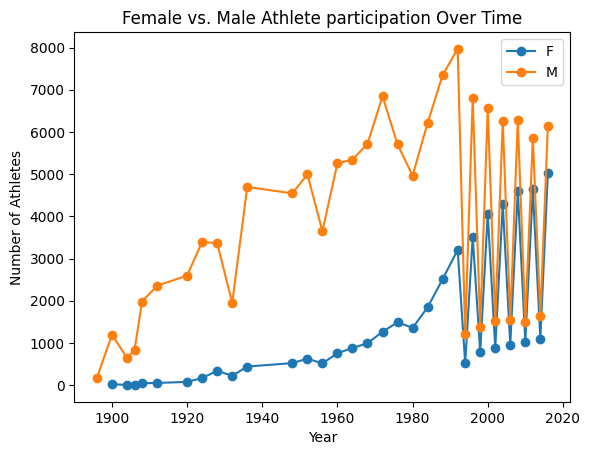

In [67]:
athlete_counts = df.groupby(['Sex', 'Year'])['Name'].nunique()

Female_counts = athlete_counts['F']
Male_counts = athlete_counts['M']

athlete_counts = athlete_counts.reset_index()

Female_data = athlete_counts[athlete_counts['Sex'] == 'F']
Male_data = athlete_counts[athlete_counts['Sex'] == 'M']

plt.plot(Female_data['Year'], Female_data['Name'], label='F', marker='o')
plt.plot(Male_data['Year'], Male_data['Name'], label='M', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Female vs. Male Athlete participation Over Time')
plt.legend()

plt.show()

### What is the distribution of ages of athletes? Are there any differences in age distributions between medal winners and non-medal winners? (You can use histograms or KDE plots.)

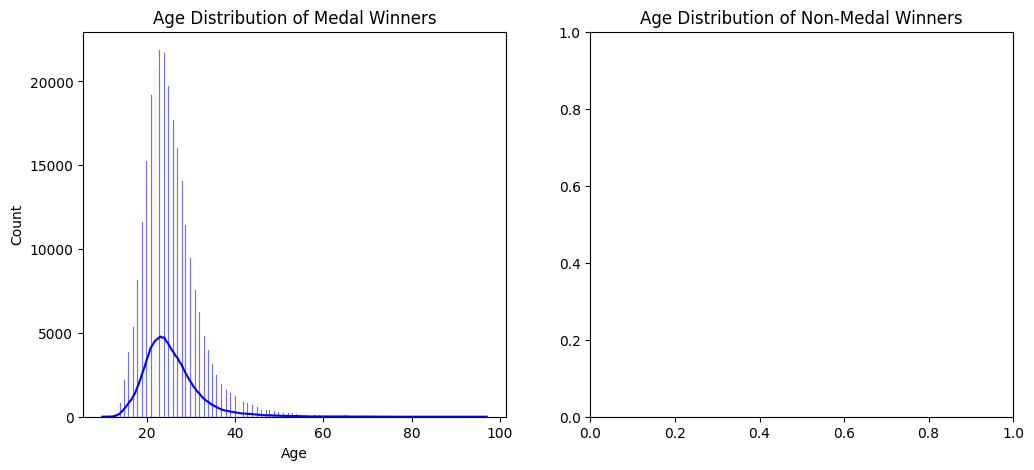

In [71]:
medal_winners = df[df['Medal'] != 'None']
non_medal_winners = df[df['Medal'] == 'None']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=medal_winners, x="Age", kde=True, color="blue", ax=axes[0])
axes[0].set_title("Age Distribution of Medal Winners")

sns.histplot(data=non_medal_winners, x="Age", kde=True, color="red", ax=axes[1])
axes[1].set_title("Age Distribution of Non-Medal Winners")

plt.show()

### Which countries have won the most medals in the last 30 years?

In [68]:
current_year = 2023
last_30_years_data = df[df['Year'] >= current_year - 30]

medal_counts = last_30_years_data.groupby(['City', 'Medal']).size().unstack(fill_value=0)
city_with_most_medals = medal_counts.sum(axis=1).idxmax()

print("City with the most medals in the last 30 years:", city_with_most_medals)

City with the most medals in the last 30 years: Beijing


### Which sports have the highest number of participants in the Summer Olympics vs. the Winter Olympics?

In [69]:
summer_data = df[df['Season'] == 'Summer']
winter_data = df[df['Season'] == 'Winter']

summer_participants = summer_data['Sport'].value_counts()
winter_participants = winter_data['Sport'].value_counts()

sport_with_most_participants_summer = summer_participants.idxmax()
sport_with_most_participants_winter = winter_participants.idxmax()

print("Sport with the most participants in Summer Olympics:", sport_with_most_participants_summer)
print("Sport with the most participants in Winter Olympics:", sport_with_most_participants_winter)

Sport with the most participants in Summer Olympics: Athletics
Sport with the most participants in Winter Olympics: Cross Country Skiing


### Is there a relationship between an athlete's height and weight across different sports? (You can use a scatter plot with height on the x-axis and weight on the y-axis, possibly color-coded by sport or medal status.)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


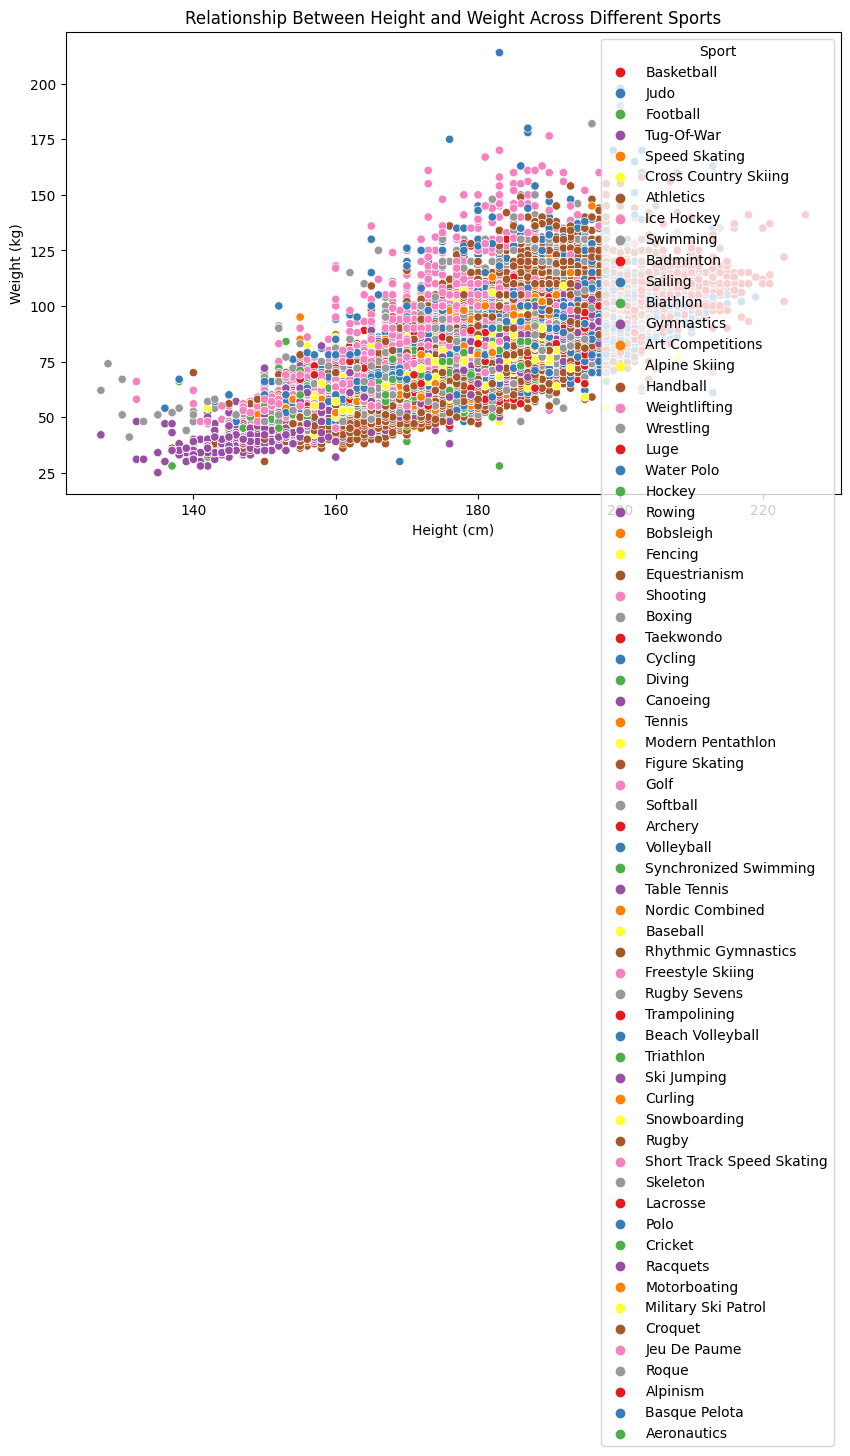

In [72]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x="Height", y="Weight", hue="Sport", palette="Set1")

plt.title("Relationship Between Height and Weight Across Different Sports")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend(title="Sport")

plt.show()